
# Classification Metrics


---

### Learning objectives

After this lesson, students will be able to 

- Understand a confusion matrix
- Calculate sensitivity/recall/TPR, specificity/TNR, and precision
- Understand and calculate F1 score
- Understand and calcuate Balanced Accuracy
- Create a ROC curve in scikit-learn
- Understand how ROC AUC is calculated
- Identify methods for handling imbalanced data

### Prior knowledge required

- Python basics
- Pandas basics
- Machine learning workflow with scikit learn
- How to caclucate accuracy

---

#### Import libraries


In [2]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer

In [3]:
import sklearn
sklearn.__version__

'1.6.1'

## Create dataset
---

Call the `load_breast_cancer()` function to create our dataset.

In [3]:
data = load_breast_cancer(as_frame=True).frame
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


#### Check the target variable values: 

Class Distribution:

212 - Malignant, 357 - Benign

from: the docs https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [5]:
data["target"].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

## Create `X` and `y`
---

⚠️ The dataset labels benign tumors as 1, and malignant tumors as 0. This is contrary to how you typically label data: the more important class (malignant) should be labeled 1. Let's fix that.

In [7]:
data["target"] = data["target"].apply(lambda x: 1 if x == 0 else 0)

In [8]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [9]:
X = data.drop(columns=["target"])

In [10]:
Y = data["target"]

In [11]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Train/Test Split
---

Create the train and test sets. 

**Note** we'll want to create a stratified split.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


## Scaling our features
---

Because we're using KNN for our model, we'll want to scale our training and testing sets.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [36]:
X_test_scaled = StandardScaler().fit_transform(X_test)

## Instantiate and fit model
---

Create and fit an instance of `KNeighborsClassifier`. Use the default parameters.

In [31]:
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)

## Predictions
---

Use our newly fitted KNN model to create predictions from the scaled `X_test`.

In [34]:
train_predictions = knn.predict(X_train_scaled)

In [33]:
test_predictions = knn.predict(X_test_scaled)

## Confusion Matrix
---

We'll create a confusion matrix using the `confusion_matrix` function from `sklearn`'s `metrics` module.

In [37]:
from sklearn.metrics import confusion_matrix

In [37]:
conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix

array([[90,  0],
       [ 1, 52]])

#### Want those values as individual integers? The function signature tells us how all four get returned.

In [42]:
true_neg = conf_matrix[0][0]
true_pos = conf_matrix[1][1]
false_neg = conf_matrix[1][0]
false_pos = conf_matrix[0][1]

#### `ConfusionMatrixDisplay.from_estimator`

scikit-learn will plot a confusion matrix. You can pass the estimator and the X and y test set data to *from_estimator*. 

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

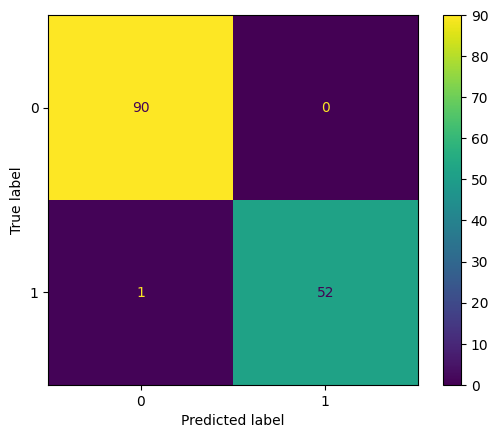

In [46]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)

Want to make it easier to read? Add `display_labels` values.

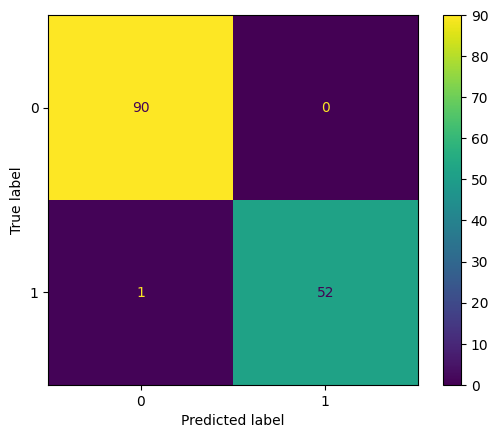

In [48]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, display_labels=knn.classes_)

Want percentages? Pass `normalize='true'`.

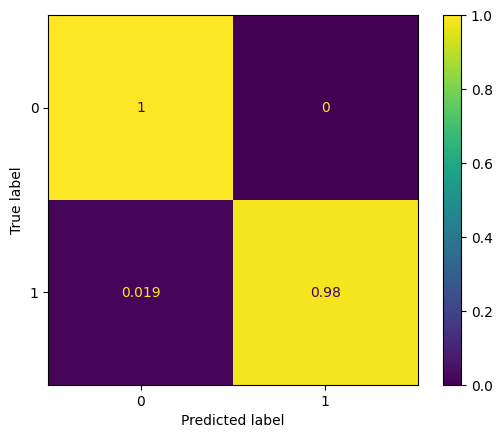

In [49]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, normalize='true')

#### How many Type I errors are there?
---

<details>
    <summary>Need a hint?</summary>
    Type I = False positive
</details>

#### How many Type II errors are there?


#### Which error is worse here (Type I vs Type II)?
---

# False negative (Type II)

#### Accuracy

#### Calculate the sensitivity
---

<details>
    <summary>Need a hint?</summary>
    It's the same as recall.
</details>

#### Calculate the specificity
---



#### Calculate the precision
---

<details>
    <summary>Need a hint?</summary>
    Precision starts with p, so it's the tp/ all the predicted positives.
</details>

#### Calculate recall
---

<details>
    <summary>Need a hint?</summary>
    Recall = Sensitivity
</details>

## Use scikit-learn functions instead

---
## Smoking dataset
Let's look at another dataset to predict mortality from smoking status and age. Data dictionary [here](https://myweb.uiowa.edu/pbreheny/data/whickham.html).

In [4]:
df_smoke = pd.read_csv('./data/Whickham.csv')

#### Inspect

In [5]:
df_smoke.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [7]:
df_smoke["smoker"] = df_smoke["smoker"].apply(lambda x: 1 if x=="Yes" else 0)

In [12]:
df_smoke["outcome"] = df_smoke["outcome"].apply(lambda x: 1 if x=="Dead" else 0)

In [13]:
df_smoke.head()

,outcome,smoker,age
0,0,1,23
1,0,1,18
2,1,1,71
3,0,0,67
4,0,0,64


- `outcome`: Whether someone is alive or dead.
- `smoker`: Whether somebody smoked or did not smoke.
- `age`: Age in years.

#### Make X and y

In [14]:
X = df_smoke.drop(columns=["outcome"])

In [15]:
Y = df_smoke["outcome"]

Make `smoker` numeric. It's just two values that will definitely be in the training and test sets, so we can just binarize it (0, or 1) instead of using a scikit-learn OneHotEncoder. 

#### Create holdout/test set and training dataset

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y)

### Null model


In [25]:
print(len(Y_train[Y_train == 0]))
print(len(Y_train))
#277 / 985 death
print(277/985)

708
985
0.2812182741116751


In [27]:
from numpy.random import rand

In [30]:
arr = rand(985)
for i in range(len(arr)):
    if arr[i] <= (277/985):
        arr[i] = 1
    else:
        arr[i] = 0

In [38]:
confusion_matrix(Y_train, arr)

array([[500, 208],
       [212,  65]])

<details><summary>In this situation, what term would we use to describe someone who is predicted to be dead but actually is alive? (Remember that alive is coded as 0 and dead is coded as 1.)</summary>

- We **falsely** predict someone to be **positive**.
- This would be a **false positive**.
</details>

<details><summary>In this situation, what is a true negative?</summary>

- We **correctly** predict someone to be **negative**.
- Someone who is predicted to be alive (`0`) and actually is alive (`0`).
</details>

## Evaluate the model performance



### Generate confusion matrix

#### Plot it!


## Basic Metrics

#### What's the accuracy?

#### What is the specificity? 

#### What is the sensitivity?

#### What is the precision?

--- 
# Exercise
## Make a better model

#### Make a LogisticRegression model with the default parameters. 


In [40]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [42]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [52]:
reg = LogisticRegression().fit(X_train_scaled, Y_train)

In [53]:
train_predictions = reg.predict(X_train_scaled)

In [54]:
test_predictions = reg.predict(X_test_scaled)

### Plot the confusion matrix

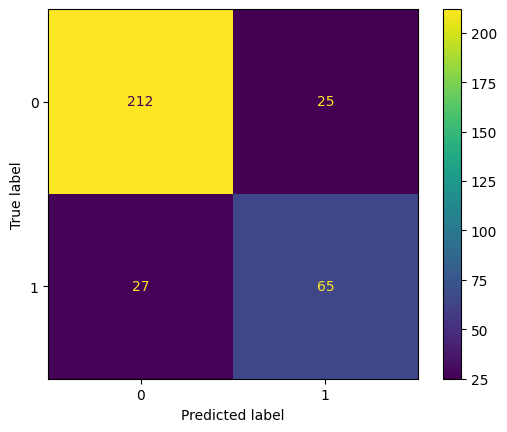

In [61]:
ConfusionMatrixDisplay.from_estimator(reg, X_test_scaled, Y_test)

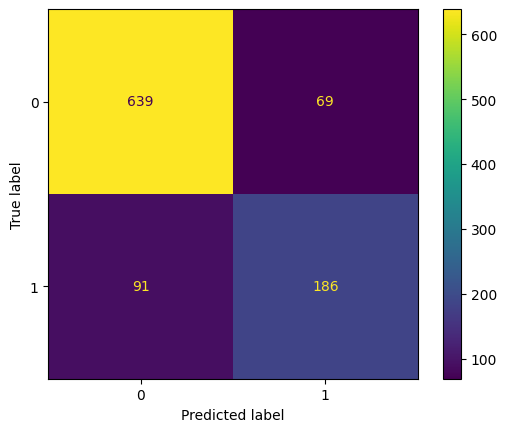

In [60]:
ConfusionMatrixDisplay.from_estimator(reg, X_train_scaled, Y_train)

### Evaluate

### Convenient reporting